In [165]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

In [166]:
def prob1A(k):
    #THS USES MONTE CARLO METHODS:
    
    x = [0.5, 1, 1.5]
    
    n = 10**k
    
    #get draws from normal distribution
    Z = np.random.normal(0, 1, n)
    #compute draws from X
    X = Z**2
      
    #(i)
    #plot the pdf for X
    plt.hist(X, bins = np.linspace(0, 1, 10), density=True)
    
    
    #(ii)
    #we want to figure out what percentage of X is less than x[i]
    #list containg counts
    cdf = []
    for i in range(3):
        less_than = 0
        for j in range(n):
            if X[j] <= x[i]:
                less_than += 1
        cdf.append(less_than / n)
    
    
    #(iii) & (iv)
    #to compute the expected value and variance we will use 
    #the unbiased estimators for the mean and variance
    mean = (1/n) * sum(X) 
    variance = (1/(n - 1)) * sum((X - mean) ** 2)


    return cdf, mean, variance

def Prob1B(k):
    #THIS USES BUILT IN PYTHON FUNCTIONS
    x = [0.5, 0.1, 1.5]
    n = 10**k
    dom = np.linspace(0, 1, 100)
    X = np.random.chisquare(1, n)
    plt.hist(X, bins = np.linspace(0, 1, 10), density=True)
    
    cdf = [sp.stats.chi2(x[i], df=1) for i in range(3)]
    var(df, loc=0, scale=1)
    std(df, loc=0, scale=1)
    
    
    return cdf, mean, variance
    
    
    
    
    

def prob3():
    
    #METHOD 1:
    #get samples of uniform distribution
    n1 = 10**5
    
    X = np.random.uniform(0, 2, n1)
    #compose with e^cos(x^2)
    H_X = np.exp(np.cos(X**2))
    #compute expected value and variance with unbiased
    #estimators
    
    mean_1 = (1/n1) * sum(H_X)
    #np.exp(np.cos(X**2)))
    
    variance_1 = (1/(n1 -1)) * sum(((H_X - mean_1)**2))
    #compute the standard error
    std_error_1 = np.sqrt(variance_1 / n1)
    #compute the area approximation
    area_1 =  2 * mean_1
    
    
    #METHOD 2:
    #in 0, 2 the max value of cos(x^2) is 1. so the max of e^(cos(x^2)) is e. 
    n2 = 5 * 10**4
    #get the x, y samples
    x = np.random.uniform(0, 2, n2)
    y = np.random.uniform(0, np.exp(1), n2)
    #compute the sample area
    square_area = 2 * np.exp(1)
    
    #get the number of successes
    interior_count = 0
    for i in range(n2):
        if 0 <= y[i] and y[i] <= np.exp(np.cos(x[i]**2)):
            interior_count += 1
            x[i] = 1
        else:
            x[i] = 0
            
    mean_2 = interior_count / n2
    area_2 = square_area * mean_2
    
    variance_2 = (1/(n2 - 1)) * sum((x - mean_2)**2)
    std_error_2 = np.sqrt(variance_2 / n2)
    
    
    return area_1, std_error_1, area_2, std_error_2

def prob4(num):
    '''
    We want the probability that a sample from beta(2,5) will be less than a sample from beta(20, 55)
    In other words P()
    
    '''
    x = np.random.beta(2, 5, num)
    y = np.random.beta(20, 55, num)
    #prob sampleBeta(20,55) - sample(beta(2,5) > 0)
    #prob(y[i] - x[i] > 0)
    
    z = x - y
    
    mean_x = (1/num) * sum(x)
    
    mean_y = (1/num) * sum(y)
    

    
    mean_z = (1/num) * sum(z)
    
    wins = np.array([1 if y[i] - x[i] > 0 else 0 for i in range(num)])
    mean = (1/num) * sum(wins)
    variance = (1/(num-1)) * sum((wins - mean)**2)
    std_error = np.sqrt(variance/ num)
    

#HELPER FUNCTION FOR PROBLEM 5 
def game():
    die = [1,2,3,4]
    money = 0
    for i in range(10):
        roll = np.random.choice(die)
        if roll == 1 or roll ==2:
            money +=1
        elif roll == 3:
            money += 2
        else:
            money -= 1
    return money
    
def prob5(n):
    negative = 0
    rolls = np.array([game() for _ in range(n)])
    for roll in rolls:
        if roll < 0:
            negative += 1
    p = negative / n
    variance = (1/(n-1)) * sum((rolls - p)**2)
    std_err = np.sqrt(variance / n)
    return p, std_err
    

# Problem 1A

K = 2
CDF values:
0.53
0.66
0.78
E[X]: 0.8734293774740529
Var(X): 1.082501349285814

K = 4
CDF values:
0.5158
0.6752
0.7751
E[X]: 1.0102612052672828
Var(X): 2.0098664296225817

K = 2
CDF values:
0.520686
0.683213
0.779694
E[X]: 0.9991190534217848
Var(X): 1.9942215972275976


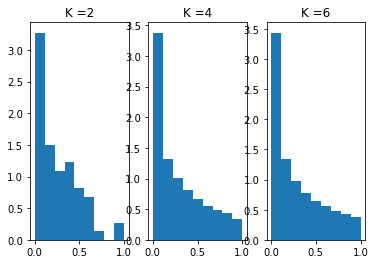

In [167]:
print('K = 2')
ax1 = plt.subplot(131)
p, m, v = prob1A(2)
ax1.set_title('K =2')
print('CDF values:')
for val in p:
    print(val)
print('E[X]: ' + str(m))
print('Var(X): ' + str(v))

print()

print('K = 4')
ax2 = plt.subplot(132)
p, m, v = prob1A(4)
ax2.set_title('K =4')
print('CDF values:')
for val in p:
    print(val)
print('E[X]: ' + str(m))
print('Var(X): ' + str(v))

print()

print('K = 2')
ax3 = plt.subplot(133)
p, m, v = prob1A(6)
ax3.set_title('K =6')
print('CDF values:')
for val in p:
    print(val)
print('E[X]: ' + str(m))
print('Var(X): ' + str(v))
 
plt.show()

# Problem1B

# Problem 3


In [168]:
area_1, std_err_1, area_2, std_err_2 = prob3()

print('Method 1:')
print('area estimate 1:', area_1)
print('standard error 1:', std_err_1)
print()
print('Method 2:')
print('area estimate 2:', area_2)
print('standard error 2:', std_err_2)


Method 1:
area estimate 1: 3.2098715176839074
standard error 1: 0.0029903619795526425

Method 2:
area estimate 2: 3.205615394665183
standard error 2: 0.002199861403770936


# Problem 4

# Problem 5
In this problem we want to make sure that the standard error is low enough so that the probability isn't varrying a ton between subsequent plays. 

In [169]:
probability, std_error = prob5(10**5)

print('Probability:', probability )
print('Standard Error:', std_error )

Probability: 0.01323
Standard Error: 0.026022176103694904
